Using the data from the [TidyTuesday project on energy use in Europe](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-08-04), make the following figure:

Hints:
- use `scale_y_log10` if you want to have a log scales y-axis
- remember that column names starting with numbers have to be enclosed in back ticks 👉\`\`

<img src="figs/01_example.png" style="width: 900px;" />

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
energy_types = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/energy_types.csv")
energy_types %>% print

Parsed with column specification:
cols(
  country = col_character(),
  country_name = col_character(),
  type = col_character(),
  level = col_character(),
  `2016` = col_double(),
  `2017` = col_double(),
  `2018` = col_double()
)



# A tibble: 296 x 7
   country country_name type                 level   `2016` `2017` `2018`
   <chr>   <chr>        <chr>                <chr>    <dbl>  <dbl>  <dbl>
 1 BE      Belgium      Conventional thermal Level 1  30728 31316  30093.
 2 BE      Belgium      Nuclear              Level 1  41430 40128. 26996.
 3 BE      Belgium      Hydro                Level 1   1476  1361.  1239.
 4 BE      Belgium      Pumped hydro power   Level 2   1110  1093.   983.
 5 BE      Belgium      Wind                 Level 1   5340  6388.  7177.
 6 BE      Belgium      Solar                Level 1   3070  3264.  3489.
 7 BE      Belgium      Geothermal           Level 1      0     0      0 
 8 BE      Belgium      Other                Level 1    476   491.   219.
 9 BG      Bulgaria     Conventional thermal Level 1  18909 20234. 19334 
10 BG      Bulgaria     Nuclear              Level 1  14932 14718. 15290 
# … with 286 more rows


In [3]:
energy_types_longer = energy_types %>%
    pivot_longer(cols = c(`2016`, `2017`, `2018`), values_to = 'Cost', , names_to = 'Year')

In [4]:
energy_types_longer %>% print

# A tibble: 888 x 6
   country country_name type                 level   Year    Cost
   <chr>   <chr>        <chr>                <chr>   <chr>  <dbl>
 1 BE      Belgium      Conventional thermal Level 1 2016  30728 
 2 BE      Belgium      Conventional thermal Level 1 2017  31316 
 3 BE      Belgium      Conventional thermal Level 1 2018  30093.
 4 BE      Belgium      Nuclear              Level 1 2016  41430 
 5 BE      Belgium      Nuclear              Level 1 2017  40128.
 6 BE      Belgium      Nuclear              Level 1 2018  26996.
 7 BE      Belgium      Hydro                Level 1 2016   1476 
 8 BE      Belgium      Hydro                Level 1 2017   1361.
 9 BE      Belgium      Hydro                Level 1 2018   1239.
10 BE      Belgium      Pumped hydro power   Level 2 2016   1110 
# … with 878 more rows


Warning message:
“Transformation introduced infinite values in continuous y-axis”


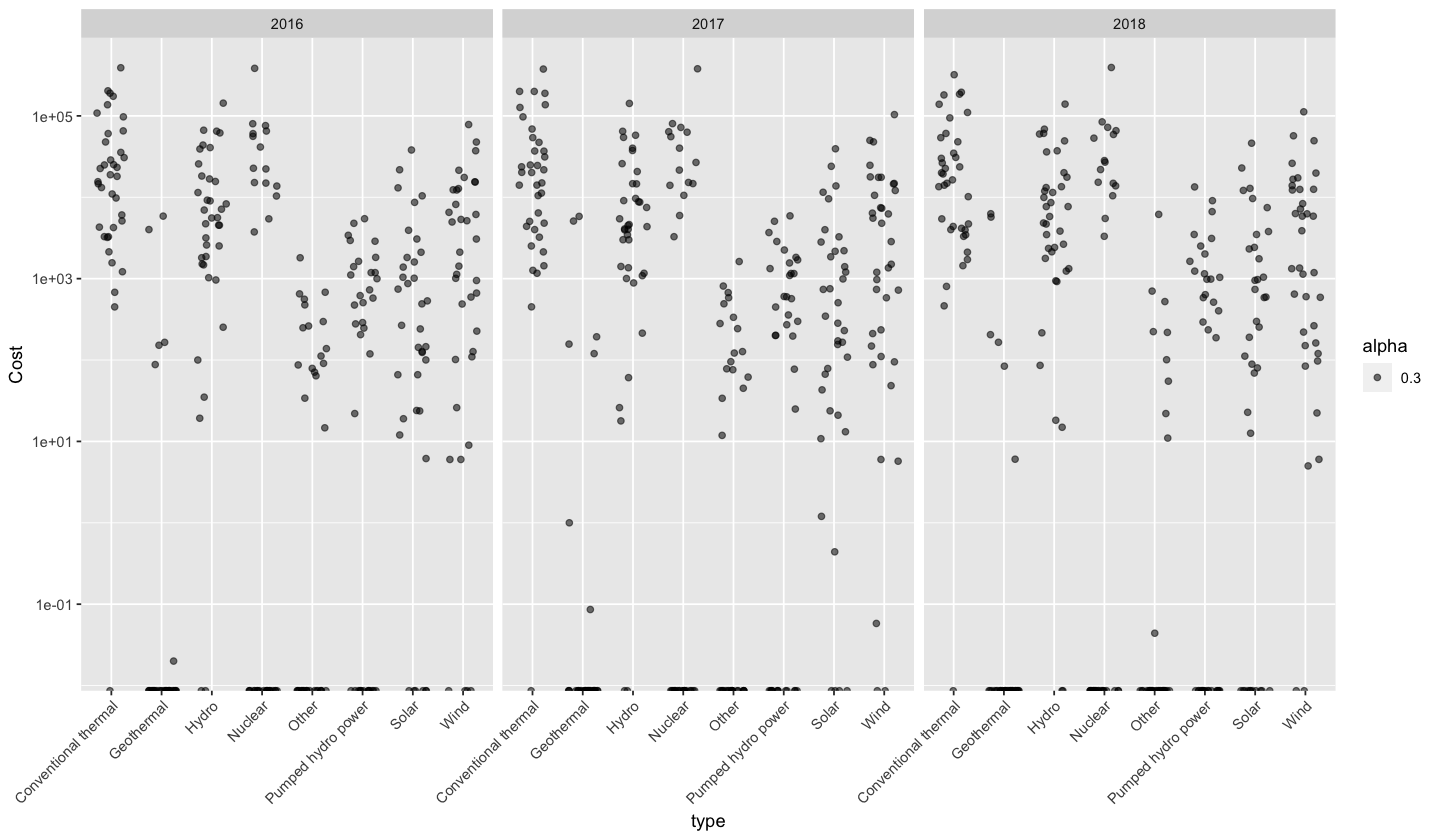

In [6]:
options(repr.plot.width= 12, repr.plot.height= 7)
ggplot(data = energy_types_longer) + 
  geom_point(aes(x = type, y = Cost, alpha = 0.3), position = position_jitter(h = 0, w = 0.3)) + 
  facet_wrap(~Year) + 

  scale_y_log10() + 
  theme(axis.text.x = element_text(hjust = 1, angle = 45))